In [1]:
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.columns.unique()

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [3]:
#quantity ordered, total_sales
import numpy as np
total_sales = {}
total_quantity = {}
for i in df.index:
    customer = df.loc[i, 'CUSTOMERNAME']
    if customer in total_sales.keys():
        sale = total_sales[customer]
        total_sales.update({customer:np.floor(sale + df.loc[i, 'SALES'])})
        freq = total_quantity[customer]
        total_quantity.update({customer:freq+1})
    else:
        total_sales.update({customer:df.loc[i, 'SALES']})
        total_quantity.update({customer:1})

In [4]:
df1 = pd.DataFrame(data=[list(total_quantity.values()), list(total_sales.values())], columns=[list(total_quantity.keys())]).T
df1.head()

,0,1
Land of Toys Inc.,49.0,164045.0
Reims Collectables,41.0,135025.0
Lyon Souveniers,20.0,78562.0
Toys4GrownUps.com,30.0,104547.0
Corporate Gift Ideas Co.,41.0,149867.0


In [5]:
print(total_quantity['AV Stores, Co.'])

51


In [6]:
df1 = df1.reset_index().rename(columns={0:'Total_Quantity', 1:'Total_Sales'})
df1.head()

,level_0,Total_Quantity,Total_Sales
0,Land of Toys Inc.,49.0,164045.0
1,Reims Collectables,41.0,135025.0
2,Lyon Souveniers,20.0,78562.0
3,Toys4GrownUps.com,30.0,104547.0
4,Corporate Gift Ideas Co.,41.0,149867.0


In [7]:
df1 = df1.rename(columns={'level_0':'Customer_name'})
df1.head()

,Customer_name,Total_Quantity,Total_Sales
0,Land of Toys Inc.,49.0,164045.0
1,Reims Collectables,41.0,135025.0
2,Lyon Souveniers,20.0,78562.0
3,Toys4GrownUps.com,30.0,104547.0
4,Corporate Gift Ideas Co.,41.0,149867.0


In [8]:
import numpy as np
data = df1[['Total_Quantity', 'Total_Sales']]
print(data)

    Total_Quantity  Total_Sales
0             49.0     164045.0
1             41.0     135025.0
2             20.0      78562.0
3             30.0     104547.0
4             41.0     149867.0
..             ...          ...
87            23.0      64580.0
88            19.0      57284.0
89            14.0      34987.0
90             8.0      33437.0
91             8.0      26476.0

[92 rows x 2 columns]


In [9]:
log_data = np.log(data)
print(log_data)

    Total_Quantity  Total_Sales
0         3.891820    12.007896
1         3.713572    11.813215
2         2.995732    11.271643
3         3.401197    11.557392
4         3.713572    11.917504
..             ...          ...
87        3.135494    11.075660
88        2.944439    10.955777
89        2.639057    10.462732
90        2.079442    10.417418
91        2.079442    10.183994

[92 rows x 2 columns]


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(log_data)
data_normal = scaler.transform(log_data)
print(data_normal[::5])

[[ 1.15539023  1.0344115 ]
 [ 0.52434198  0.51997709]
 [ 1.35484913  1.37538714]
 [ 0.1262912   0.2537727 ]
 [ 1.04629769  0.90133501]
 [ 0.41965998  0.51763882]
 [ 0.84760469  0.80207593]
 [ 0.41965998  0.51691441]
 [ 0.52434198  0.66515024]
 [-0.15057634 -0.09646035]
 [ 0.57439547  0.34676543]
 [-0.0065993  -0.02172118]
 [ 0.41965998  0.27460109]
 [ 0.6230388   0.44475519]
 [ 0.76125049  0.79888639]
 [-0.77721405 -0.71925034]
 [-3.66770973 -3.81796733]
 [-0.07708763 -0.18838625]
 [-1.97408809 -1.63715314]]


In [11]:
#Fit KMeans and use elbow method to choose the number of clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(data_normal)
    sse[k] = kmeans.inertia_

C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [12]:
print(sse)

{1: 184.00000000000003, 2: 99.05875805108452, 3: 56.27639441751201, 4: 28.38201440122776, 5: 17.70730965578712, 6: 12.161255436300923, 7: 7.546481852898098, 8: 5.592436738556523, 9: 4.486989759414897, 10: 3.700953417475279, 11: 3.0743470570664977, 12: 2.7310675168950644, 13: 2.4594301937788714, 14: 2.2092764246338232, 15: 2.0912157758832954, 16: 1.8219066495411496, 17: 1.718959912217177, 18: 1.4595648692963854, 19: 1.3803194776868453, 20: 1.3351533977982382}


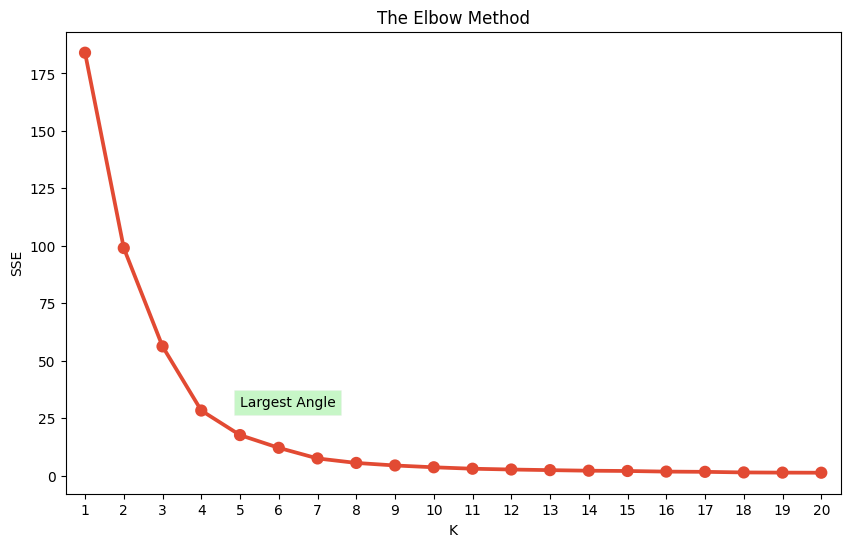

In [13]:
plt.figure(figsize=(10,6))
plt.title('The Elbow Method')

plt.xlabel('K')
plt.ylabel('SSE')
plt.style.use('ggplot')

sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.text(4, 30, "Largest Angle", bbox = dict(facecolor = 'lightgreen', alpha = 0.5))
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_normal)
cluster_labels = kmeans.labels_
df1 = df1.assign(Cluster = cluster_labels)
df1.head(100)

C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer_name,Total_Quantity,Total_Sales,Cluster
0,Land of Toys Inc.,49.0,164045.0,1
1,Reims Collectables,41.0,135025.0,1
2,Lyon Souveniers,20.0,78562.0,0
3,Toys4GrownUps.com,30.0,104547.0,1
4,Corporate Gift Ideas Co.,41.0,149867.0,1
...,...,...,...,...
87,"Australian Collectables, Ltd",23.0,64580.0,0
88,Gift Ideas Corp.,19.0,57284.0,0
89,"Bavarian Collectables Imports, Co.",14.0,34987.0,2
90,Royale Belge,8.0,33437.0,2


In [16]:
print(df1['Cluster'].unique())

[1 0 3 2 4]
